## 测量因子

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from Utility.factorFactory import FactorFactory
from Utility.Util import evaluate_time_series_ic
import matplotlib.pyplot as plt

### （1）预处理数据：

In [2]:
df = pd.read_csv ('df_minute.csv')
df.shape

(1920, 16)

In [3]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'dollar_volume',
       'vwap', 'tick_count', 'trade_size_mean', 'trade_size_std',
       'zero_return_count', 'price_direction_ratio', 'large_trade_count',
       'large_trade_ratio', 'large_trade_volume_ratio'],
      dtype='object')

In [4]:
finfact = FactorFactory(df)

In [5]:
finfact.generate_factors (layers=2, include_only_bounded_factors=True)
df_featured = finfact.df_features
df_featured.shape

🔄 Layer 2 cross: 100%|██████████| 4900/4900 [00:00<00:00, 73612.22it/s]


(1901, 4901)

### （3）评测因子：

In [10]:
finfact.evaluate_factors(forward_period=5, window=100, top_k=100)
summary = finfact.get_ic_summary(sort_by='spearman_ic', by_abs=True)

SyntaxError: invalid syntax (4038849815.py, line 3)

In [11]:
summary

,spearman_ic,pearson_ic_mean,pearson_ic_std,pearson_ic_ir,combined_score
rsi_10_close_minus_rsi_6_large_trade_volume_ratio,-0.077051,-0.162962,0.125445,-1.299070,1.376121
rsi_6_large_trade_volume_ratio_minus_rsi_10_close,0.077051,0.162962,0.125445,1.299070,1.376121
rsi_10_close_minus_rsi_10_large_trade_volume_ratio,-0.076267,-0.184997,0.141480,-1.307587,1.383855
rsi_10_large_trade_volume_ratio_minus_rsi_10_close,0.076267,0.184997,0.141480,1.307587,1.383855
rsi_14_close_minus_rsi_6_large_trade_volume_ratio,-0.076238,-0.168670,0.122692,-1.374738,1.450977
...,...,...,...,...,...
rsi_14_close_mul_rsi_14_trade_size_std,-0.055169,-0.179137,0.134075,-1.336101,1.391270
rsi_14_close_mul_rsi_14_trade_size_mean,-0.054535,-0.207423,0.153312,-1.352949,1.407485
rsi_14_trade_size_mean_mul_rsi_14_close,-0.054535,-0.207423,0.153312,-1.352949,1.407485
rsi_14_high_mul_rsi_14_close,-0.050635,-0.194043,0.144983,-1.338379,1.389015


#### IC分析

In [ ]:
results = evaluate_time_series_ic(
    df=df_featured,
    factors=df_featured.columns.tolist(),
    target_col='close',
    forward=5,        # 往后 5 个 timestamp
    date_col='timestamp',
    window=100,
    n_jobs=12
)
results

In [ ]:
# 选择出优质因子
results[results['ic_global'].abs () > 0.03]

#### 相关性检测

In [19]:
usable_factors = summary.loc[summary['combined_score'].abs() > 1].index.tolist()
existing_factors = [col for col in usable_factors if col in df_featured.columns]
df_filtered = df_featured[existing_factors]

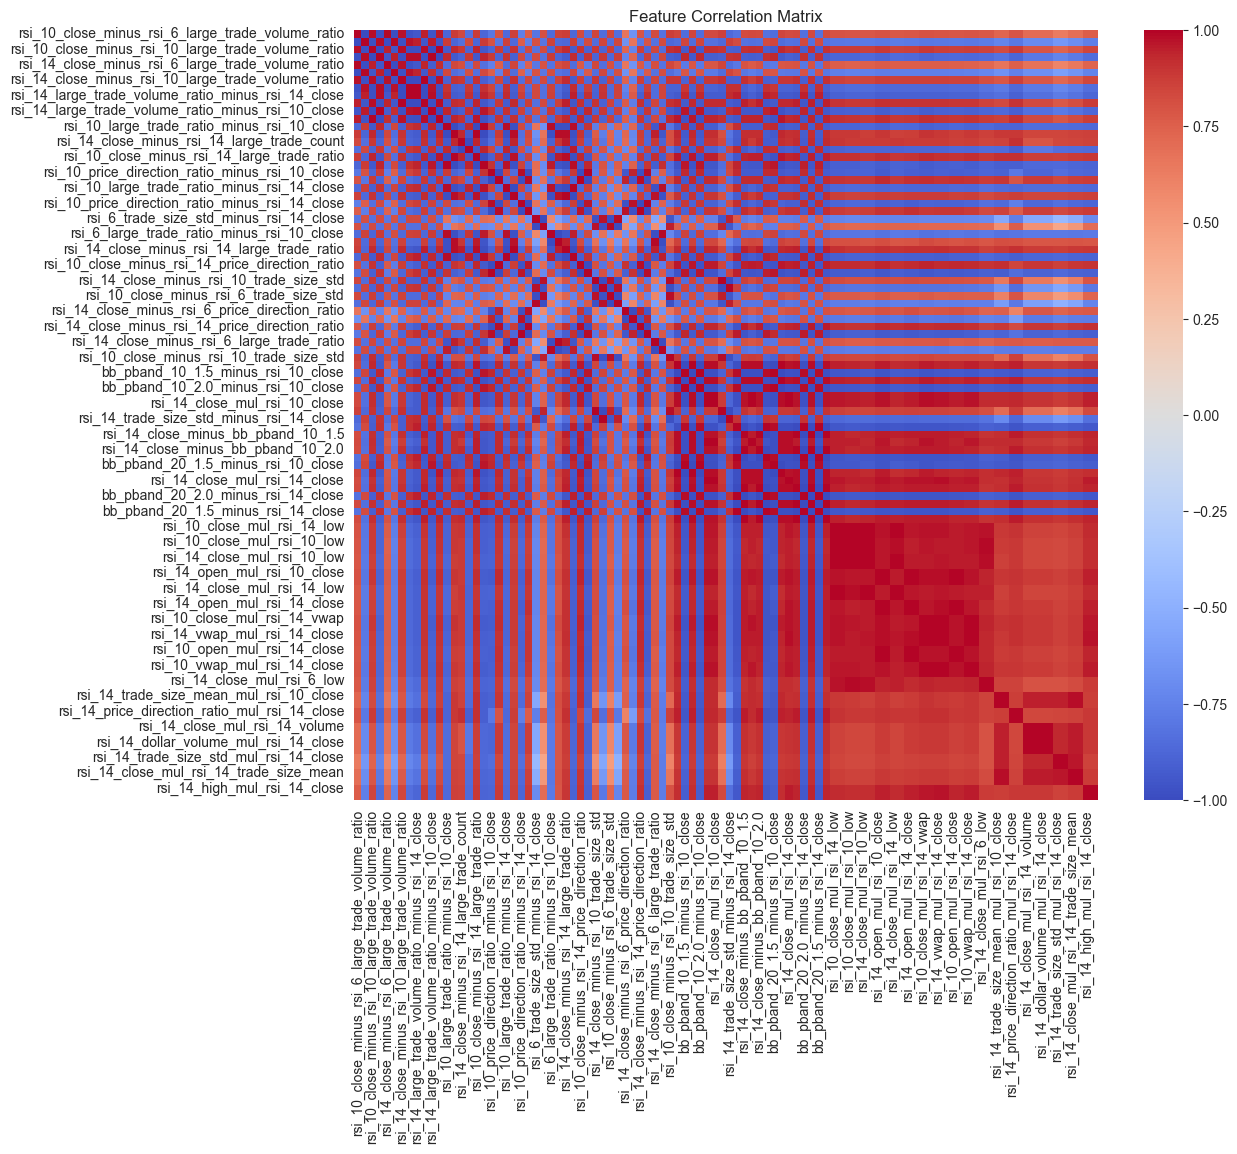

In [20]:
corr = pd.DataFrame(df_filtered).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

#### PCA分析

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_featured)
percent = 0.99

cumulative = np.cumsum(pca.explained_variance_ratio_)
n_PCs = np.argmax(cumulative >= percent) + 1

print(f"前 {n_PCs} 个主成分累计解释了 {cumulative[n_PCs - 1]:.2%} 的方差")
feature_names = df_featured.columns

# 打印所有有重大贡献的主成分
for i in range(n_PCs):
    # 第 i 个主成分的系数
    pc = pca.components_[i]
    
    # 取绝对值最大的特征位置
    top_feature_idx = np.argmax(np.abs(pc))
    top_feature_name = feature_names[top_feature_idx]
    
    print(f"PC{i+1} 的主导因子是: {top_feature_name}（贡献系数: {pc[top_feature_idx]:.4f}）")

前 19 个主成分累计解释了 99.00% 的方差
PC1 的主导因子是: rsi_6_vwap_mul_rsi_6_vwap（贡献系数: 0.0581）
PC2 的主导因子是: rsi_6_volume_mul_rsi_6_volume（贡献系数: 0.0715）
PC3 的主导因子是: rsi_6_trade_size_std_mul_rsi_6_trade_size_std（贡献系数: 0.0827）
PC4 的主导因子是: rsi_6_large_trade_ratio_mul_rsi_6_large_trade_ratio（贡献系数: 0.1030）
PC5 的主导因子是: rsi_6_high_mul_rsi_6_high（贡献系数: 0.1245）
PC6 的主导因子是: rsi_6_close_mul_rsi_6_close（贡献系数: 0.1198）
PC7 的主导因子是: rsi_6_open_mul_rsi_6_open（贡献系数: 0.0965）
PC8 的主导因子是: rsi_6_low_mul_rsi_6_low（贡献系数: 0.0934）
PC9 的主导因子是: rsi_6_large_trade_volume_ratio_mul_rsi_6_large_trade_volume_ratio（贡献系数: 0.0780）
PC10 的主导因子是: rsi_6_price_direction_ratio_mul_rsi_6_price_direction_ratio（贡献系数: 0.0915）
PC11 的主导因子是: rsi_6_vwap_mul_rsi_6_vwap（贡献系数: 0.1134）
PC12 的主导因子是: rsi_6_low_mul_rsi_6_low（贡献系数: 0.0753）
PC13 的主导因子是: rsi_6_large_trade_count_mul_rsi_6_large_trade_count（贡献系数: 0.0952）
PC14 的主导因子是: rsi_6_trade_size_mean_mul_rsi_6_trade_size_mean（贡献系数: 0.0877）
PC15 的主导因子是: rsi_6_large_trade_ratio_mul_rsi_6_large_trade_ratio（贡献系数: 